# Santander Customer Transaction Prediction

## Introduction

### Challenge description by the holder: 

At Santander our mission is to help people and businesses prosper. We are always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals.

Our data science team is continually challenging our machine learning algorithms, working with the global data science community to make sure we can more accurately identify new ways to solve our most common challenge, binary classification problems such as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?

In this challenge, we invite Kagglers to help us identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided for this competition has the same structure as the real data we have available to solve this problem.

More information can be found in the [Santander Customer Transaction Prediction](https://www.kaggle.com/c/santander-customer-transaction-prediction/) on Kaggle.

## Implementation

In [1]:
# data analysis
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, auc, roc_curve

In E:\ANACONDA\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In E:\ANACONDA\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In E:\ANACONDA\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In E:\ANACONDA\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In E:\ANACONDA\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in Matplo

### Fetch the data:

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

### Preview the data

In [3]:
train_data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
test_data.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [7]:
train_data.shape, test_data.shape

((200000, 202), (200000, 201))

There are 200 features named with var_0 to var_199 and 20000 rows of data. All the features are numerical and all the types are float64.

### Check the missing values

In [8]:
train_data.isnull().sum().any(), test_data.isnull().sum().any()

(False, False)

There are no missiing values (blank, null or empty). So we don't need to drop NA values.

### Plot the target value in training set

<AxesSubplot:xlabel='target', ylabel='count'>

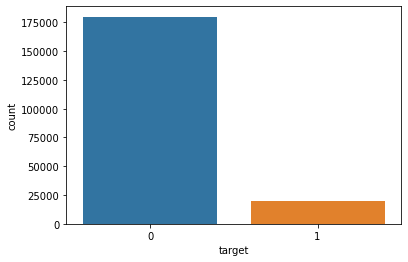

In [9]:
sns.countplot(x = train_data['target'])

We can see that the outcome is imbalance. Most target values are 0.

### Find X_train, Y_train, X_test

In [10]:
X_train = train_data.drop(['ID_code','target'],axis = 1)
Y_train = train_data['target']
X_test = test_data.drop(['ID_code'],axis = 1)

### Data Part Todo List (maybe):
* statistic analysis
* features correlations
* duplicate values
* resampling
* feature engineering

### Modelling

The model list we decide to choose:
* Logistic Regression
* KNN or k-Nearest Neighbors
* Support Vector Machines
* Naive Bayes classifier
* Decision Tree
* Random Forrest
* Perceptron
* Artificial neural network
* RVM or Relevance Vector Machine

First we define a function to evaluate outputs of different models:

In [11]:
def evaluation(Y_true,Y_pred):
    
    # how many decimal places to round up
    dec_num = 3
    
    acc = accuracy_score(Y_true,Y_pred)
    # todo: micro/macro metrics
    prec, rec, f1, _ = precision_recall_fscore_support(Y_true,Y_pred,average='micro',warn_for=())
    
    print("Accuracy:", round(acc, dec_num))
    print("Precision:", round(prec, dec_num))
    print("Recall:", round(rec, dec_num))
    print("F1 Score:", round(f1, dec_num))
    
    # false_positive_rate, recall, thresholds
    fpr,tpr,thr = roc_curve(Y_true,Y_pred)    
    print("ROC:",auc(fpr,tpr))
    
    plt.plot(fpr,tpr,marker = 'o')
#     plt.plot([0,1],[0,1],'r--')
#     plt.title("AUC=%0.2f"%roc_auc)
    plt.show()

Then we split the original training data to 80% training and 20% testing.

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X_train,Y_train,train_size=0.8,random_state=0)

#### Logistic Regression

Accuracy: 0.914
Precision: 0.914
Recall: 0.914
F1 Score: 0.914
ROC: 0.6289507523423479


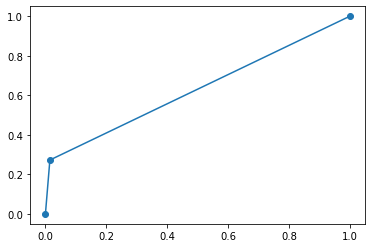

In [13]:
logistic_model = LogisticRegression(solver='liblinear')
logistic_model.fit(x_train,y_train.ravel())
logistic_predict = logistic_model.predict(x_test)

evaluation(y_test,logistic_predict)

#### Random Forest

Accuracy: 0.9
Precision: 0.9
Recall: 0.9
F1 Score: 0.9
ROC: 0.5


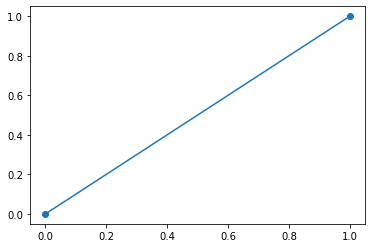

In [14]:
random_forest_model = RandomForestClassifier(n_estimators=10,max_depth=7,random_state=0)
random_forest_model.fit(x_train,y_train.ravel())
random_forest_predict = random_forest_model.predict(x_test)

evaluation(y_test,random_forest_predict)

#### Naive Bayes

Accuracy: 0.921
Precision: 0.921
Recall: 0.921
F1 Score: 0.921
ROC: 0.6725859674543755


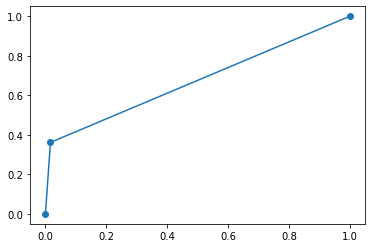

In [15]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(x_train,y_train.ravel())
naive_bayes_predict = naive_bayes_model.predict(x_test)

evaluation(y_test,naive_bayes_predict)

### Model Part Todo List (maybe):
* Cross Validation
* confirm hyper-parameters

### Hyper-parameters To Confirm (maybe):
* Logistic Regression: C, penalty

### Final Prediction

In [16]:
Y_pred1 = logistic_model.predict(X_test)
Y_pred2 = random_forest_model.predict(X_test)
Y_pred3 = naive_bayes_model.predict(X_test)

### Make submission

In [17]:
submission1 = pd.DataFrame({"ID_code": test_data["ID_code"],"target": Y_pred1})
submission1.to_csv('submission1.csv', index=False)

submission2 = pd.DataFrame({"ID_code": test_data["ID_code"],"target": Y_pred2})
submission2.to_csv('submission2.csv', index=False)

submission3 = pd.DataFrame({"ID_code": test_data["ID_code"],"target": Y_pred3})
submission3.to_csv('submission3.csv', index=False)